# Importing Libraries

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Project 
## Screentime EDA Analysis Of Indian Kids (2025)

In [59]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Indian_Kids_Screen_Time.csv")

# Data Info

In [60]:
df.shape

(9712, 8)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [62]:
df.head() 

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


# Data  Handling & Cleaning 

In [63]:
df.isna().sum()
df["Health_Impacts"]=df["Health_Impacts"].fillna(df["Health_Impacts"].mode()[0])
df.isna().sum()
df.duplicated().sum()

np.int64(47)

# EDA & Visualization

## Histplot distribution of different factors by exceeded recommended limit

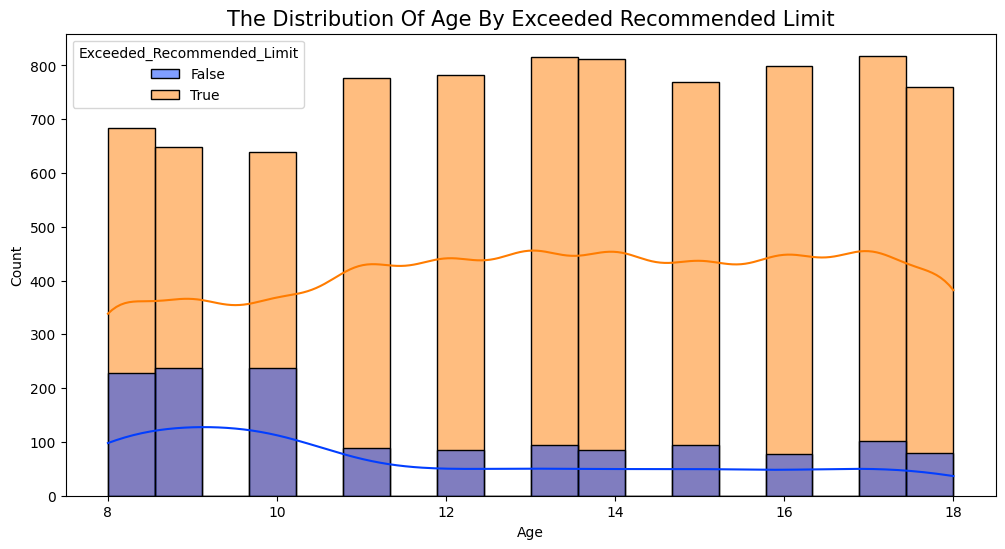

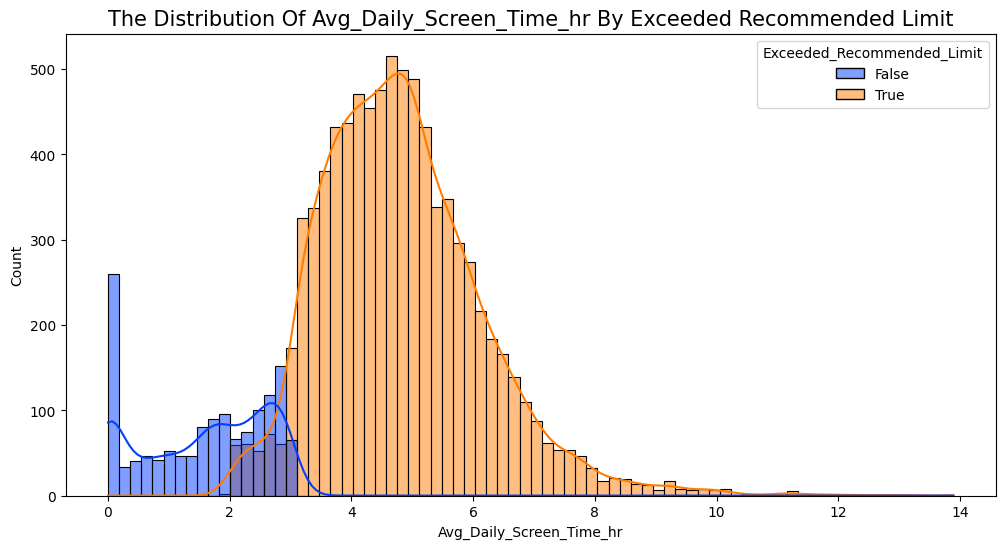

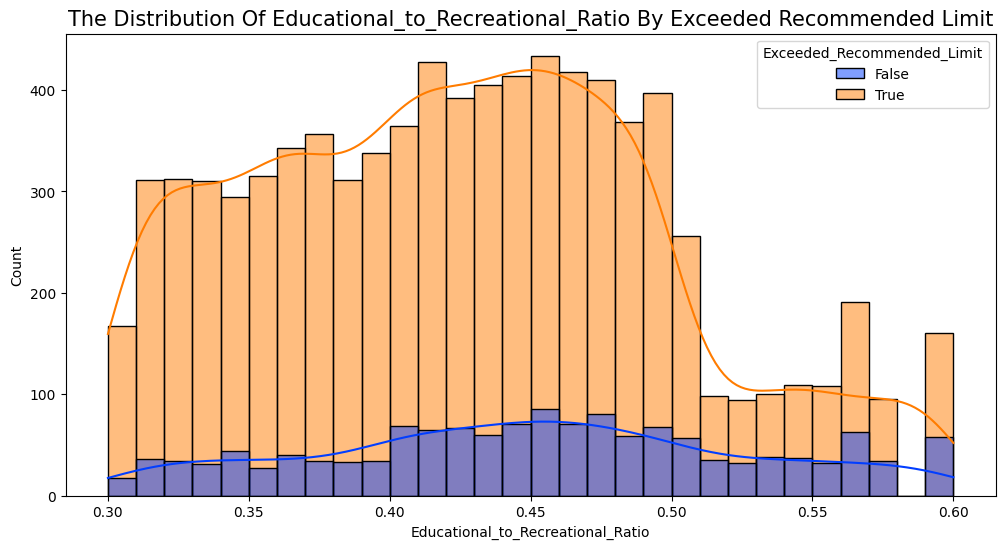

In [64]:
num=df.select_dtypes(include="number")
for col in num:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,hue="Exceeded_Recommended_Limit",edgecolor="black",palette="bright")
    plt.title(f"The Distribution Of {col} By Exceeded Recommended Limit",size=15)
    plt.show()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     9712 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


## Age Distribution by Gender

In [66]:
import plotly.express as px

px.histogram(df, x='Age', nbins=30, color='Gender', marginal='box',
             title='Age Distribution by Gender')


## Screen Time by Gender

In [67]:
px.violin(df, y='Avg_Daily_Screen_Time_hr', x='Gender', box=True, points='all',
          title='Screen Time by Gender')


In [68]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,Poor Sleep,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


## Recommended Screen Time Exceedance

## Exceeded Recommended Screen Time

In [69]:
fig = px.pie(df, names='Exceeded_Recommended_Limit',
             title='Exceeded Recommended Screen Time?',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


## Educational vs Recreational Ratio

In [70]:
fig = px.scatter(df, x='Avg_Daily_Screen_Time_hr', y='Educational_to_Recreational_Ratio',
                 color='Exceeded_Recommended_Limit', symbol='Gender',
                 hover_data=['Age', 'Primary_Device'],
                 title='Educational vs Recreational Usage')
fig.show()


## Device Popularity

In [71]:
device_counts = df['Primary_Device'].value_counts().reset_index()
device_counts.columns = ['Device', 'Count']

fig = px.bar(device_counts, x='Device', y='Count', color='Device',
             title='Primary Device Usage')
fig.show()


## Tech Preferences: Urban vs Rural

In [72]:
px.sunburst(df, path=['Urban_or_Rural', 'Primary_Device'],
            values=None, color='Urban_or_Rural',
            title='Tech Preferences: Urban vs Rural')


## Screen Time and Health Impacts

In [73]:
fig = px.box(df, x='Health_Impacts', y='Avg_Daily_Screen_Time_hr', color='Health_Impacts',
             title='Health Impact vs Daily Screen Time',
             hover_data=['Age', 'Gender'])
fig.show()


## Screen Time across Age Groups

In [74]:
import pandas as pd

# Bin ages into groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 25, 35, 50, 65, 100],
                         labels=['Child', 'Teen', 'Youth', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])

fig = px.box(df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', color='Age_Group',
             title='Screen Time across Age Groups')
fig.show()


## Educational vs Recreational Ratio Heatmap

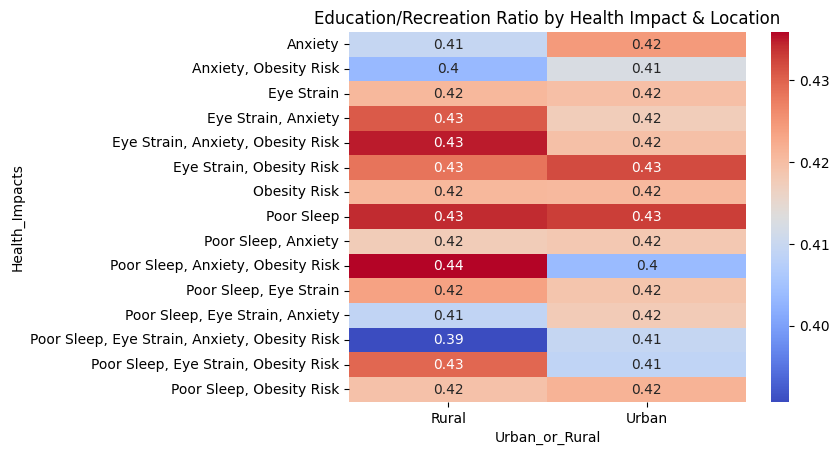

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(values='Educational_to_Recreational_Ratio',
                             index='Health_Impacts', columns='Urban_or_Rural')

sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Education/Recreation Ratio by Health Impact & Location')
plt.show()


## Correlation Heatmap (Numerical Columns)

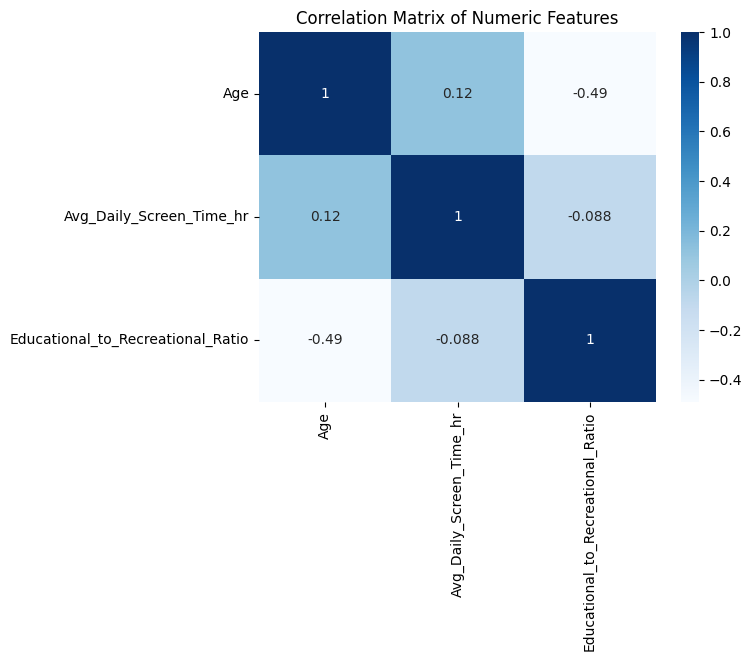

In [77]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()

sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numeric Features')
plt.show()
